In [1]:
#######################
# standard code block #
#######################

% pylab inline
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html

%config InlineBackend.figure_format = 'svg'

UsageError: Line magic function `%` not found.


# Introduction to Pandas

## From the Pandas Documentation:

Here are just a few of the things that pandas does well:

- Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

### 10 Minutes Intro to Pandas ###

Pandas has an official 10 minute intro.

http://pandas.pydata.org/pandas-docs/stable/10min.html

## Set Up Pandas Default Parameters

In [3]:
# imports a library 'pandas', names it as 'pd'
# this is a common convention
import pandas as pd
import numpy as np

In [2]:
star_wars = pd.Series([["Luke","Obi-Wan","Yoda"],"Leia",["Han","Lendo"],"Chewi",["R-2","3-PO"]],["Jedi","Princess","Scavanger","Beast","Droid"])
star_wars

l= [np.random.randint(1,10) for i in range(5)]
a= [np.random.randint(1,10) for i in range(5)]
s1= pd.Series(l, a)

s2= pd.Series(star_wars["Jedi"])

# s3= pd.Series(a,["a","b","c","d","e","f"])
print(s1)
print(s2)

9    7
4    1
4    5
9    6
7    9
dtype: int64
0       Luke
1    Obi-Wan
2       Yoda
dtype: object


In [5]:
# if you run into trouble, it's often helpful to know which version you're on
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 1.3.4
Numpy version: 1.21.4


In [6]:
whos

Variable    Type      Data/Info
-------------------------------
a           list      n=5
l           list      n=5
np          module    <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
os          module    <module 'os' from 'C:\\Us<...>n\\Python39\\lib\\os.py'>
pd          module    <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
s1          Series    9    7\n4    1\n4    5\n9<...>  6\n7    9\ndtype: int64
s2          Series    0       Luke\n1    Obi-Wa<...>      Yoda\ndtype: object
star_wars   Series    Jedi         [Luke, Obi-W<...>R-2, 3-PO]\ndtype: object
sys         module    <module 'sys' (built-in)>


In [7]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Data Structures

### 1. Series

One Dimensional Array / Vector of Values (Think these as your data columns).  One important aspect of them is that they carry an "index" (which you can think of as a row indicator).

### 2. DataFrames

Think of DataFrame as a Table with Columns.  This is the workhorse of everything you will do with data analysis.  Learning Pandas and its functions can be challenging, but stick with it and ask questions.  Structurally, a DataFrame can be thought of as a collection of Series objects with the same index.

### 3. [Panel Data](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html)

Three Dimensional Arrays  (Mentioned for reference, but we will not get much into these)

## So, What is a Pandas DataFrame?

In [8]:
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool' = False,
    fastpath: 'bool' = False,
)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Values must be hashable and have the same 

In [9]:
## Make a Series
s = pd.Series(index=list("######"),data=[1, 3, 5, np.nan, 6, 8])

s

#    1.0
#    3.0
#    5.0
#    NaN
#    6.0
#    8.0
dtype: float64

In [14]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
col

In [10]:
## Make a dataframe from a numpy array
df1 = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df1.iloc[1:4]

,A,B,C,D
1,-0.703,-0.229,0.168,0.334
2,1.581,-0.896,0.662,-0.487
3,-0.073,2.039,-0.452,0.656


In [20]:
## Make a dataframe from a numpy array
b= list(range(5))

# index   ---> label for rows
# columns ---> label for columns
# data
df1 = pd.DataFrame(data=[[1],[1,0],[10]],index= list("Hi!") , columns=list('12'))
print(df1)

    1    2
H   1  NaN
i   1  0.0
!  10  NaN


In [75]:
## Make a dataframe from a dictionary
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(data=1, index=list(range(5)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
}, index=list("Fahd"))
df2["C"]

F   NaN
a   NaN
h   NaN
d   NaN
Name: C, dtype: float32

## Load a Data Set

### [Census Income Dataset](http://archive.ics.uci.edu/ml/datasets/Census+Income)

pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql, and even copy and paste...
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [79]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

In [18]:
# download the data and name the columns
cols = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
    'income'
]

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=cols)


In [13]:

dfmta= pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_211113.txt")

In [16]:
dfmta.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
212168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/12/2021,04:00:00,REGULAR,5554,778
212169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/12/2021,08:00:00,REGULAR,5554,778
212170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/12/2021,12:00:00,REGULAR,5554,778
212171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/12/2021,16:00:00,REGULAR,5554,781
212172,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/12/2021,20:00:00,REGULAR,5554,781


### Q: What's happening in the above cell?

In [19]:
(df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [17]:
# we can see there are no null values
# columns with numerical values are type int64, no need to set data type

df.info()

NameError: name 'df' is not defined

### head

Displays the first few rows in the dataframe

In [159]:
# to view the first 5 or specify with ex: .head(10)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### tail

Displays the last few rows in the dataframe

In [160]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### sample

Displays a sample of rows in the dataframe

In [20]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Q: What do you expect to happen when you re-run the cell?

What actually happens? Why?

### Columns

Returns a list of columns in the dataframe

In [162]:
# view all columns of the dataframe
(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country_of_origin',
       'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [22]:
dfmta.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

## Rename Columns

In [23]:
dfmta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [173]:
# replace a column name
df.rename(columns={'country_of_origin': "native_counrty","income":"total_income"}, inplace=True)
df.columns
# df["total_income"]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_counrty',
       'total_income'],
      dtype='object')

In [24]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Q: What does `in_place` do above?

## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### describe

Displays summary statistic for each numerical column

In [27]:
dfmta["ENTRIES"].describe()

count    2.122e+05
mean     4.179e+07
std      2.197e+08
min      0.000e+00
25%      2.327e+05
50%      1.371e+06
75%      6.040e+06
max      2.147e+09
Name: ENTRIES, dtype: float64

### value_counts

Counts the number of occurrences of each categorical value for the column

In [29]:
dfmta['STATION']

0                 59 ST
1                 59 ST
2                 59 ST
3                 59 ST
4                 59 ST
              ...      
212168    RIT-ROOSEVELT
212169    RIT-ROOSEVELT
212170    RIT-ROOSEVELT
212171    RIT-ROOSEVELT
212172    RIT-ROOSEVELT
Name: STATION, Length: 212173, dtype: object

age  education    
20    Some-college    413
21    Some-college    372
19    Some-college    329
35    HS-grad         320
33    HS-grad         313
                     ... 
71    1st-4th           1
      12th              1
      11th              1
70    11th              1
18    Masters           1
Length: 965, dtype: int64


<AxesSubplot:xlabel='age,education'>

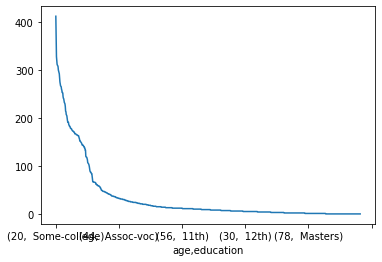

In [30]:
print(df[["age","education"]].value_counts())
df[["age","education"]].value_counts().plot()

<AxesSubplot:>

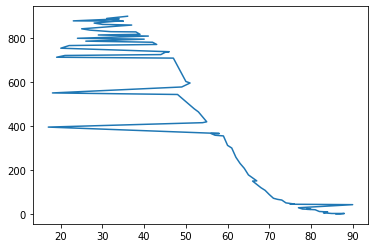

In [219]:
df.age.value_counts().plot()

In [208]:

print(df.education.value_counts,df.age.value_counts())

## Also works for numeric columns - treating the individual values as factors

<bound method IndexOpsMixin.value_counts of 0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object> 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


In [199]:
type(df.education.value_counts())

pandas.core.series.Series

<AxesSubplot:>

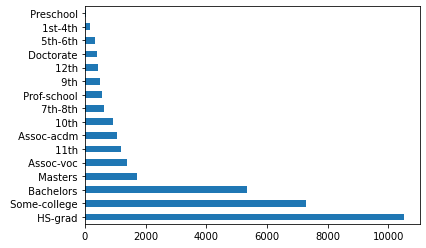

In [220]:
df.education.value_counts().plot(kind='barh')

In [221]:
df.hours_per_week.mean()

# Can also do:
df['hours_per_week'].mean()

40.437455852092995

### Q: What do you think we will get if we ask for the `type` of `df.hours_per_week` ?


In [226]:
print(df.hours_per_week.mean())
type(df.hours_per_week.mean())

40.437455852092995


numpy.float64

### Unique

Returns the unique values for the column

In [229]:
# there's a space before each string in this data
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [241]:
# looks like it's in every object column
print(df.age.unique())
len(df.age.unique())

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object


In [242]:
df["education"] = df.education.str.strip()

In [243]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [247]:
df.gender=df.gender.str.strip()
df.gender.unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
# Remove leading space in values
df["gender"] = df.gender.str.strip()

In [ ]:
df.gender.unique()

In [33]:
dfmta.index
print(dfmta.iloc[1:5,1:3])

   UNIT       SCP
1  R051  02-00-00
2  R051  02-00-00
3  R051  02-00-00
4  R051  02-00-00


## Selecting Rows and Columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [178]:
# select a row and a sequence of columns
df.iloc[3,0:4]

age                53
workclass     Private
fnlwgt         234721
education        11th
Name: 3, dtype: object

In [ ]:
df.iloc[0:3]

## Note: I got 3 rows returned, similar to the indexing that applies to Python lists

In [ ]:
# select a range of rows
df.iloc[10:15]

In [ ]:
# last 2 rows
df.iloc[-2:]

In [ ]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

In [ ]:
# select a row
df.loc[0:3]

### Q: Why did I get 4 rows above here instead of 3?





Integers vs. labels!

In [ ]:
(df.loc[0:2, 'age'])

In [ ]:
df.iloc[0:2, 2:6]

In [40]:
(dfmta["ENTRIES"] > 500000)

0          True
1          True
2          True
3          True
4          True
          ...  
212168    False
212169    False
212170    False
212171    False
212172    False
Name: ENTRIES, Length: 212173, dtype: bool

## Filtering

In [34]:
(df.age > 50)

0        False
1        False
2        False
3         True
4        False
         ...  
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, Length: 32561, dtype: bool

In [42]:
asd = df[df.age > 50].head(5)
asd

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [43]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]

# What happens if I try to do the same with df.iloc instead of df.loc?


,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
...,...,...,...,...,...
32542,72,HS-grad,?,Male,<=50K
32548,65,Prof-school,Prof-specialty,Male,<=50K
32554,53,Masters,Exec-managerial,Male,>50K
32558,58,HS-grad,Adm-clerical,Female,<=50K


In [44]:
df[df.age > 50].head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K


## Now Filter on Gender

In [ ]:
df.gender == 'Male'

In [ ]:
df.loc[df.gender == 'Male', ]

## Now Filter on Gender and Age Between 30 and 40

In [ ]:
(df.gender == 'Male') & (df.age >= 30) & (df.age <= 40)

In [ ]:
(df.age >= 30) & (df.gender == 'Male')

df.loc[(df.age >= 30) & (df.gender == 'Male') & (df.age <= 40), :]

## Find Nulls

In [ ]:
# as we saw with df.info() there are no nulls...
# but if there were this would find the rows where age is null
df[df.age.isnull()]

## Fill Nulls

In [ ]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])

In [ ]:
null_df

In [ ]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

In [ ]:
# fillna does not do it inplace unless you specify
null_df

In [ ]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median(), inplace=True)
null_df

In [ ]:
null_df.fillna('random_string')

## Drop Nulls

In [ ]:
null_df = pd.DataFrame([1, 2, 4, np.nan], columns=['column1'])
null_df

In [ ]:
null_df.dropna(how = 'any')

In [ ]:
# .isnull() and .notnull() do opposite things
null_df.isnull()

In [ ]:
null_df.notnull()

## Groupby

In [ ]:
df.groupby('relationship').count()

In [ ]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['education']).mean()

In [ ]:
df.groupby([
    'education',
    'age',
])[['hours_per_week', 'capital_gain']].mean()

In [ ]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

In [ ]:
df.columns

In [ ]:
# can use the aggs function to aggregate columns separately
gb = df.groupby(['income', 'native_country'])
gb_aggs = gb.agg({'age': 'mean', 'capital_gain': 'sum'})
gb_aggs.sample(1)

In [ ]:
# combine groupby with boolean
df[df.native_country == ' United-States'].groupby(
    ['education']).hours_per_week.mean()

## Sort
* ### sort_index() to sort by index
* ### sort_values() to sort by values

In [ ]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income', 'native_country']).mean().sort_values(
    'age', ascending=True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

In [ ]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly